## Завдання 1


    Імпортуємо необхідні пакети:

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

Завантажуємо вбудований в бібліотеку scikiklearn набір даних:

In [3]:
data_digits = load_digits()

Візуалізуємо перших 36 цифр з набору даних:

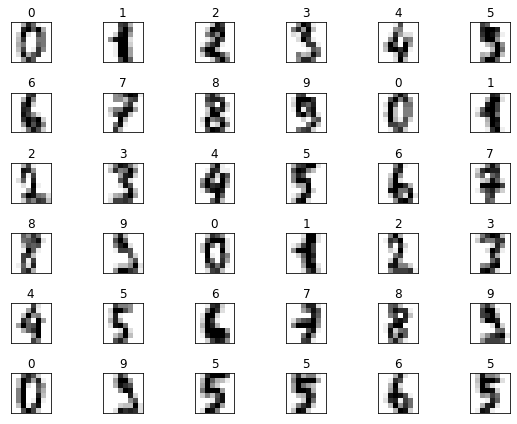

In [4]:
figure, axes = plt.subplots(nrows=6, ncols=6, figsize=(8,6))

for ax, image, label in zip(axes.ravel(), data_digits.images, data_digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(label)

plt.tight_layout()
plt.show()

## Завдання 2

Розіб'ємо дані на навчальні та тестові(75% до 25%): 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data_digits.data, data_digits.target, test_size=0.3)

In [7]:
X_train.shape

(1257, 64)

In [8]:
X_test.shape

(540, 64)

## Завдання 3

Створюємо та начаємо модель:

In [9]:
KNN = KNeighborsClassifier()
KNN.fit(X=X_train, y=y_train)

KNeighborsClassifier()

## Завдання4

Виконуємо прогнозування  класів

In [10]:
import warnings


warnings.filterwarnings('ignore', category=FutureWarning)

# Make predictions
predicted = KNN.predict(X_test)
expected = y_test


## Завдання 5

Порівняємо прогнозовані цифри з очікуваними

In [11]:
predicted[:36]

array([9, 9, 6, 0, 4, 1, 4, 8, 1, 4, 3, 5, 3, 8, 4, 1, 7, 2, 3, 7, 8, 3,
       1, 7, 6, 4, 1, 1, 3, 9, 7, 2, 9, 6, 6, 3])

In [12]:
expected[:36]

array([9, 9, 6, 0, 4, 1, 4, 8, 1, 4, 3, 5, 3, 8, 4, 1, 7, 2, 3, 7, 8, 3,
       1, 7, 6, 4, 1, 1, 3, 9, 7, 2, 9, 6, 6, 3])

## Завдання 6

Оцінимо якість моделі використовуючи метод score

In [13]:
print(f'Точність: {KNN.score(X_test, y_test):.2%}')

Точність: 98.70%


Створимо та виведемо матрицю невідповідностей

In [14]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)
confusion

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 62,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 57,  0,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  0, 51,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 63,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 58,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 49,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 51]], dtype=int64)

## Завдання 7

Використовуючи функцію sklearn.metrics виведемо звіт класифікації

In [15]:
names = [str(digit) for digit in data_digits.target_names]
print(classification_report(expected, predicted, target_names=names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.97      1.00      0.98        62
           2       1.00      1.00      1.00        52
           3       1.00      0.95      0.97        60
           4       1.00      0.98      0.99        52
           5       1.00      1.00      1.00        63
           6       1.00      1.00      1.00        58
           7       0.93      1.00      0.97        43
           8       0.98      0.96      0.97        51
           9       0.98      0.98      0.98        52

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



## Завдання 8

Для пошуку кращої моделі створимо та навчимо моделі SVC та GaussianNB

In [16]:
SVC = SVC(kernel='linear')
SVC.fit(X_train, y_train)

GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

Оцінимо якість моделей використовуючи метод score

In [19]:
print(f'Точність KNN: {KNN.score(X_test, y_test):.2%}')
print(f'Точність SVC: {SVC.score(X_test, y_test):.2%}')
print(f'Точність GaussianNB: {GNB.score(X_test, y_test):.2%}')

Точність KNN: 98.70%
Точність SVC: 99.07%
Точність GaussianNB: 82.22%


Як бачимо в даному випадку найгіршим виявся GaussianNB

## Завдання 9

Поекспериментуємо з різними значеннями k і порівняємо їх ефективність

In [20]:
for n in range(1, 20):
    KNN = KNeighborsClassifier(n_neighbors=n)
    KNN.fit(X=X_train, y=y_train)
    print(f'При К рівне {n}, точність : {KNN.score(X_test, y_test):.2%}')

При К рівне 1, точність : 98.52%
При К рівне 2, точність : 98.15%
При К рівне 3, точність : 98.33%
При К рівне 4, точність : 98.33%
При К рівне 5, точність : 98.70%
При К рівне 6, точність : 98.70%
При К рівне 7, точність : 98.70%
При К рівне 8, точність : 98.33%
При К рівне 9, точність : 98.15%
При К рівне 10, точність : 98.15%
При К рівне 11, точність : 97.96%
При К рівне 12, точність : 98.15%
При К рівне 13, точність : 98.15%
При К рівне 14, точність : 97.96%
При К рівне 15, точність : 97.96%
При К рівне 16, точність : 97.96%
При К рівне 17, точність : 97.78%
При К рівне 18, точність : 97.78%
При К рівне 19, точність : 97.41%


В даному випадку найкращими параметрами стали декілька, а саме k = 5, k = 6, k = 7. Отже значення параметру 
за замовчуванням (k=5) є ефективним